In [59]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'cf667913-ccc4-4d69-8ae3-70f24e85eae7',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data    

In [60]:
type(data)

dict

In [61]:
import pandas as pd
#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [62]:
#This normalizes the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11800,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19783937.00000,19783937.00000,False,NaN,1,NaN,NaN,None,2024-11-18T13:29:00.000Z,89771.72073,53541194881.67898,20.29140,-0.86075,-1.08660,9.57760,31.73496,41.84120,48.22874,1776038067320.59863,58.96040,1885206135347.70996,None,2024-11-18T13:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 19:01:07.973054
1,1027,Ethereum,ETH,ethereum,9563,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120424008.02827,120424008.02827,True,NaN,2,NaN,NaN,None,2024-11-18T13:29:00.000Z,3070.69093,26653053123.38843,-2.66320,-0.11043,-1.41445,-2.95261,16.40844,25.41809,16.28237,369784909804.94031,12.27600,369784909804.94000,None,2024-11-18T13:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 19:01:07.973054
2,825,Tether USDt,USDT,tether,103827,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,127539192697.57086,129825664180.66248,True,NaN,3,NaN,NaN,None,2024-11-18T13:29:00.000Z,1.00020,129913191305.69667,-6.65510,0.01208,0.03140,-0.04092,0.02959,-0.03215,-0.01372,127564248955.84477,4.23480,129851169637.48000,None,2024-11-18T13:29:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-18 19:01:07.973054
3,5426,Solana,SOL,solana,787,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,474592527.45785,588570648.40939,True,NaN,4,NaN,NaN,None,2024-11-18T13:30:00.000Z,239.81806,7901897967.69988,-12.42870,-1.29898,3.60983,10.72059,55.20818,69.52371,64.68660,113815860730.70917,3.77840,141149872941.26001,None,2024-11-18T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 19:01:07.973054
4,1839,BNB,BNB,bnb,2282,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142587737.64811,142587737.64811,False,NaN,5,NaN,NaN,None,2024-11-18T13:30:00.000Z,614.91830,2120538965.37535,-15.72420,-0.16640,-2.04673,-0.44430,3.00578,8.64265,8.03518,87679809680.23428,2.91080,87679809680.23000,None,2024-11-18T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 19:01:07.973054
5,52,XRP,XRP,xrp,1431,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56931242174.00000,99987013354.00000,False,NaN,6,NaN,NaN,None,2024-11-18T13:30:00.000Z,1.12564,10003252440.33343,-53.00720,-0.12963,2.58876,93.77397,106.42017,91.56168,86.81051,64084053819.67635,2.12420,112563947970.46001,None,2024-11-18T13:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 19:01:07.973054
6,74,Dogecoin,DOGE,dogecoin,1101,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146842346383.70526,146842346383.70526,True,NaN,7,NaN,NaN,None,2024-11-18T13:29:00.000Z,0.36063,7076984846.51692,-11.11680,-0.55854,-1.56396,25.03124,149.09459,242.34280,245.55799,52955664284.60789,1.75800,52955664284.61000,None,2024-11-18T13:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 19:01:07.973054
7,3408,USDC,USDC,usd-coin,23150,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,37116049135.11525,37116049135.11525,False,NaN,8,NaN,NaN,None,2024-11-18T13:30:00.000Z,1.00009,8529656278.75991,9.21340,0.01260,0.01166,0.03265,0.01637,0.00566,0.00667,37119532029.69720,1.23230,37119532029.70000,None,2024-11-18T13:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36

In [64]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'cf667913-ccc4-4d69-8ae3-70f24e85eae7',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    
    # Use this if you just want to keep it in a dataframe
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df

    #create a csv and append data to it
    if not os.path.isfile(r'C:\Users\adity\OneDrive\Desktop\Python\API.csv'):
        df.to_csv(r'C:\Users\adity\OneDrive\Desktop\Python\API.csv', header='column_names')
    else:   
       df.to_csv(r'C:\Users\adity\OneDrive\Desktop\Python\API.csv', mode='a', header=False)
        

In [65]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [66]:
df72 = pd.read_csv(r'C:\Users\adity\OneDrive\Desktop\Python\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,11800,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19783884.00000,19783884.00000,False,NaN,1,NaN,NaN,NaN,2024-11-18T10:46:00.000Z,91919.70131,49122665193.46147,7.94230,0.14135,0.94887,11.79934,34.63778,47.29503,51.15686,1818528707986.67603,58.88010,1930313727462.21997,NaN,2024-11-18T10:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 16:18:09.773199
1,1,1027,Ethereum,ETH,ethereum,9562,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120424008.02827,120424008.02827,True,NaN,2,NaN,NaN,NaN,2024-11-18T10:46:00.000Z,3121.15744,25309100067.46196,-15.79770,0.47350,-0.69402,-2.45615,18.12400,28.50452,17.32061,375862288621.07690,12.16960,375862288621.08002,NaN,2024-11-18T10:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 16:18:09.773199
2,2,825,Tether USDt,USDT,tether,103802,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,127539192697.57086,129825664180.66248,True,NaN,3,NaN,NaN,NaN,2024-11-18T10:47:00.000Z,1.00002,124420979619.23196,-13.58750,-0.01130,0.00594,-0.06517,0.01400,-0.00957,-0.05834,127542128510.98988,4.12990,129828652626.17000,NaN,2024-11-18T10:47:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-18 16:18:09.773199
3,3,5426,Solana,SOL,solana,787,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,474595837.89345,588572622.33836,True,NaN,4,NaN,NaN,NaN,2024-11-18T10:47:00.000Z,247.43546,8053471281.89510,-6.85280,1.79898,3.05163,14.40736,59.98320,78.35792,68.81451,117431840996.15678,3.80260,145633739452.73999,NaN,2024-11-18T10:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 16:18:09.773199
4,4,1839,BNB,BNB,bnb,2282,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,142587746.34495,142587746.34495,False,NaN,5,NaN,NaN,NaN,2024-11-18T10:47:00.000Z,623.35290,2136782587.43210,-17.19890,0.03127,-1.98449,-0.71762,4.21353,11.92113,9.64058,88882484637.39862,2.87810,88882484637.39999,NaN,2024-11-18T10:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 16:18:09.773199
5,5,52,XRP,XRP,xrp,1430,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,56931242174.00000,99987013354.00000,False,NaN,6,NaN,NaN,NaN,2024-11-18T10:47:00.000Z,1.14049,10447520042.47183,-54.50220,0.72347,6.29071,94.44039,108.94323,94.76271,87.45940,64929370836.71221,2.10220,114048751366.20000,NaN,2024-11-18T10:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 16:18:09.773199
6,6,74,Dogecoin,DOGE,dogecoin,1101,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,146840966383.70520,146840966383.70520,True,NaN,7,NaN,NaN,NaN,2024-11-18T10:46:00.000Z,0.37284,6971780899.86399,-12.35980,0.33924,2.01148,29.14611,155.09907,256.94499,253.19003,54747599683.18076,1.77260,54747599683.18000,NaN,2024-11-18T10:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 16:18:09.773199
7,7,3408,USDC,USDC,usd-coin,23145,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,37118675624.49673,37118675624.49673,False,NaN,8,NaN,NaN,NaN,2024-11-18T10:47:00.000Z,0.99992,7996057158.14222,0.15400,-0.02071,-0.00379,-0.00044,0.00408,0.00032,-0.02406,37115550625.50179,1.20180,37115550625.50000,NaN,2024-11-18T10:47:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b869

In [67]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [68]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11800,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19783937.00000,19783937.00000,False,NaN,1,NaN,NaN,None,2024-11-18T13:31:00.000Z,89792.28291,53618485502.85490,20.45220,-0.95131,-1.05691,9.67786,31.76398,42.23926,48.08521,1776444868086.10718,58.97390,1885637941012.87012,None,2024-11-18T13:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 19:03:20.356605
1,1027,Ethereum,ETH,ethereum,9563,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120424008.02827,120424008.02827,True,NaN,2,NaN,NaN,None,2024-11-18T13:31:00.000Z,3072.25251,26674495945.31095,-2.59880,-0.18565,-1.35631,-2.93088,16.48603,25.78820,16.29520,369972961013.31750,12.28230,369972961013.32001,None,2024-11-18T13:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 19:03:20.356605
2,825,Tether USDt,USDT,tether,103828,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,127539192697.57086,129825664180.66248,True,NaN,3,NaN,NaN,None,2024-11-18T13:32:00.000Z,1.00009,130115904069.08014,-6.48970,-0.00581,0.02670,-0.05866,0.01275,0.00146,-0.04823,127550863715.72078,4.22490,129837544432.14000,None,2024-11-18T13:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-18 19:03:20.356605
3,5426,Solana,SOL,solana,787,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,474592527.45785,588570648.40939,True,NaN,4,NaN,NaN,None,2024-11-18T13:32:00.000Z,240.20374,7904714867.38189,-12.47320,-1.24712,3.67000,10.95520,55.33962,69.69180,64.94425,113998901262.06230,3.77600,141376872478.73999,None,2024-11-18T13:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 19:03:20.356605
4,1839,BNB,BNB,bnb,2282,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142587737.64811,142587737.64811,False,NaN,5,NaN,NaN,None,2024-11-18T13:32:00.000Z,615.66066,2119367551.20025,-15.90030,-0.12788,-1.99942,-0.34176,3.13837,8.82066,8.14699,87785660968.66307,2.90780,87785660968.66000,None,2024-11-18T13:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 19:03:20.356605
5,52,XRP,XRP,xrp,1431,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56931242174.00000,99987013354.00000,False,NaN,6,NaN,NaN,None,2024-11-18T13:31:00.000Z,1.13029,10001751351.57706,-53.01350,-0.02929,2.80654,94.58395,107.27722,92.42813,87.54824,64348542928.81165,2.13300,113028524359.50999,None,2024-11-18T13:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 19:03:20.356605
6,74,Dogecoin,DOGE,dogecoin,1101,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146842346383.70526,146842346383.70526,True,NaN,7,NaN,NaN,None,2024-11-18T13:31:00.000Z,0.36093,7076787509.20636,-11.12850,-0.75643,-1.44718,25.07767,149.19783,242.81697,245.57546,52999158787.50310,1.75950,52999158787.50000,None,2024-11-18T13:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-18 19:03:20.356605
7,3408,USDC,USDC,usd-coin,23150,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,37116049135.11525,37116049135.11525,False,NaN,8,NaN,NaN,None,2024-11-18T13:32:00.000Z,0.99994,8532543893.12162,9.19850,-0.00571,0.00177,0.00246,0.00126,0.00039,-0.01700,37113737480.04120,1.22930,37113737480.04000,None,2024-11-18T13:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b

In [69]:
# Now let's look at the coin trends over time
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.95131,-1.05691,9.67786,31.76398,42.23926,48.08521
Ethereum,-0.18565,-1.35631,-2.93088,16.48603,25.78820,16.29520
Tether USDt,-0.00581,0.02670,-0.05866,0.01275,0.00146,-0.04823
Solana,-1.24712,3.67000,10.95520,55.33962,69.69180,64.94425
BNB,-0.12788,-1.99942,-0.34176,3.13837,8.82066,8.14699
XRP,-0.02929,2.80654,94.58395,107.27722,92.42813,87.54824
Dogecoin,-0.75643,-1.44718,25.07767,149.19783,242.81697,245.57546
USDC,-0.00571,0.00177,0.00246,0.00126,0.00039,-0.01700
Cardano,-0.80801,0.68227,21.23748,107.82322,107.53101,111.91116


In [70]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.95131
             quote.USD.percent_change_24h    -1.05691
             quote.USD.percent_change_7d      9.67786
             quote.USD.percent_change_30d    31.76398
             quote.USD.percent_change_60d    42.23926
             quote.USD.percent_change_90d    48.08521
Ethereum     quote.USD.percent_change_1h     -0.18565
             quote.USD.percent_change_24h    -1.35631
             quote.USD.percent_change_7d     -2.93088
             quote.USD.percent_change_30d    16.48603
             quote.USD.percent_change_60d    25.78820
             quote.USD.percent_change_90d    16.29520
Tether USDt  quote.USD.percent_change_1h     -0.00581
             quote.USD.percent_change_24h     0.02670
             quote.USD.percent_change_7d     -0.05866
             quote.USD.percent_change_30d     0.01275
             quote.USD.percent_change_60d     0.00146
             quote.USD.percent_change_90

In [71]:
type(df3)

pandas.core.frame.DataFrame

In [72]:
type(df4)

pandas.core.series.Series

In [73]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.95131
            quote.USD.percent_change_24h  -1.05691
            quote.USD.percent_change_7d    9.67786
            quote.USD.percent_change_30d  31.76398
            quote.USD.percent_change_60d  42.23926
            quote.USD.percent_change_90d  48.08521
Ethereum    quote.USD.percent_change_1h   -0.18565
            quote.USD.percent_change_24h  -1.35631
            quote.USD.percent_change_7d   -2.93088
            quote.USD.percent_change_30d  16.48603
            quote.USD.percent_change_60d  25.78820
            quote.USD.percent_change_90d  16.29520
Tether USDt quote.USD.percent_change_1h   -0.00581
            quote.USD.percent_change_24h   0.02670
            quote.USD.percent_change_7d   -0.05866
            quote.USD.percent_change_30d   0.01275
            quote.USD.percent_change_60d   0.00146
            quote.USD.percent_change_90d  -0.04823
Solana      quote.USD.percent_change_1h   -1.24712
            quote.USD.percent_change_24h   3.67000
            quote.USD.percent_change_7d   10.95520
            quote.USD.percent_change_30d  55.33962
            quote.USD.percent_change_60d  69.69180
            quote.USD.percent_change_90d  64.94425
BNB         quote.USD.percent_change_1h   -0.12788
            quote.USD.percent_change_24h  -1.99942
            quote.USD.percent_change_7d   -0.34176
            quote.USD.percent_change_30d   3.13837
            quote.USD.percent_change_60d   8.82066
            quote.USD.percent_change_90d   8.14699
XRP         quote.USD.percent_change_1h   -0.02929
            quote.USD.percent_change_24h   2.80654
            quote.USD.percent_change_7d   94.58395
            quote.USD.percent_change_30d 107.27722
            quote.USD.percent_change_60d  92.42813
            quote.USD.percent_change_90d  87.54824
Dogecoin    quote.USD.percent_change_1h   -0.75643
            quote.USD.percent_change_24h  -1.44718
            quote.USD.percent_change_7d   25.07767
            quote.USD.percent_change_30d 149.19783
            quote.USD.percent_change_60d 242.81697
            quote.USD.percent_change_90d 245.57546
USDC        quote.USD.percent_change_1h   -0.00571
            quote.USD.percent_change_24h   0.00177
            quote.USD.percent_change_7d    0.00246
            quote.USD.percent_change_30d   0.00126
            quote.USD.percent_change_60d   0.00039
            quote.USD.percent_change_90d  -0.01700
Cardano     quote.USD.percent_change_1h   -0.80801
            quote.USD.percent_change_24h   0.68227
            quote.USD.percent_change_7d   21.23748
            quote.USD.percent_change_30d 107.82322
            quote.USD.percent_change_60d 107.53101
            quote.USD.percent_change_90d 111.91116
TRON        quote.USD.percent_change_1h   -0.31236
            quote.USD.percent_change_24h   2.69744
            quote.USD.percent_change_7d   22.12361
            quote.USD.percent_change_30d  27.77022
            quote.USD.percent_change_60d  33.80879
            quote.USD.percent_change_90d  33.17071
Shiba Inu   quote.USD.percent_change_1h   -0.68536
            quote.USD.percent_change_24h  -1.43346
            quote.USD.percent_change_7d   -4.94276
            quote.USD.percent_change_30d  26.33171
            quote.USD.percent_change_60d  70.01869
            quote.USD.percent_change_90d  77.10717
Avalanche   quote.USD.percent_change_1h   -1.27556
            quote.USD.percent_change_24h  -6.05017
            quote.USD.percent_change_7d    7.43162
            quote.USD.percent_change_30d  23.36423
            quote.USD.percent_change_60d  30.23696
            quote.USD.percent_change_90d  55.31285
Toncoin     quote.USD.percent_change_1h   -0.58298
            quote.USD.percent_change_24h  -1.31281
            quote.USD.percent_change_7d    2.35427
            quote.USD.percent_change_30d   3.45350
            quote.USD.percent_change_60d  -6.08417
            quo

In [74]:
type(df5)

pandas.core.frame.DataFrame

In [75]:
df5.count()

values    90
dtype: int64

In [76]:
#create a range and pass that as the dataframe
index = pd.Index(range(90))
# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6
# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.95131
1,Bitcoin,quote.USD.percent_change_24h,-1.05691
2,Bitcoin,quote.USD.percent_change_7d,9.67786
3,Bitcoin,quote.USD.percent_change_30d,31.76398
4,Bitcoin,quote.USD.percent_change_60d,42.23926
5,Bitcoin,quote.USD.percent_change_90d,48.08521
6,Ethereum,quote.USD.percent_change_1h,-0.18565
7,Ethereum,quote.USD.percent_change_24h,-1.35631
8,Ethereum,quote.USD.percent_change_7d,-2.93088
9,Ethereum,quote.USD.percent_change_30d,16.48603


In [21]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.47526
1,Bitcoin,quote.USD.percent_change_24h,-0.55862
2,Bitcoin,quote.USD.percent_change_7d,10.02608
3,Bitcoin,quote.USD.percent_change_30d,32.72022
4,Bitcoin,quote.USD.percent_change_60d,43.83577
5,Bitcoin,quote.USD.percent_change_90d,49.13901
6,Ethereum,quote.USD.percent_change_1h,1.01489
7,Ethereum,quote.USD.percent_change_24h,-1.14183
8,Ethereum,quote.USD.percent_change_7d,-2.96964
9,Ethereum,quote.USD.percent_change_30d,16.79364


In [87]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.47526
1,Bitcoin,24h,-0.55862
2,Bitcoin,7d,10.02608
3,Bitcoin,30d,32.72022
4,Bitcoin,60d,43.83577
5,Bitcoin,90d,49.13901
6,Ethereum,1h,1.01489
7,Ethereum,24h,-1.14183
8,Ethereum,7d,-2.96964
9,Ethereum,30d,16.79364


In [88]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.47526
1,Bitcoin,24h,-0.55862
2,Bitcoin,7d,10.02608
3,Bitcoin,30d,32.72022
4,Bitcoin,60d,43.83577
5,Bitcoin,90d,49.13901
6,Ethereum,1h,1.01489
7,Ethereum,24h,-1.14183
8,Ethereum,7d,-2.96964
9,Ethereum,30d,16.79364


In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

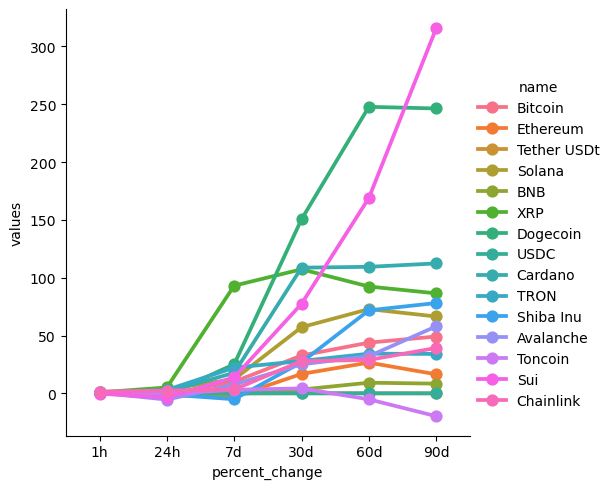

In [90]:
#visualizing the data
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')